<div style="display: flex; justify-content: center;">
    <img src="../images/Logo-personal_Fondo_blanco.png" alt="Logo_personal" /> 
</div>
<p align="center">
  <h1 align="center">Descriptive Statistics<h1>
  <h4 align="center">Obesity rates dataset</h4>
</p>

---

## Introduction
This notebook is the result of the practice carried out in the course ["Curso de Matemáticas para Data Science: Estadística Descriptiva"](https://platzi.com/cursos/estadistica-descriptiva/), where the Dataset "ObesityDataSet_raw_and_data_synthetic" was used evaluates obesity rates in individuals from Colombia, Peru and Mexico.

The purpose of the project is to put into practice the concepts of descriptive statistics focused on data science, through the following workflow:

- Development
  - Data types and description
  - Null Data Review
- Statistical analysis
  - Measures of central tendency
  - Measures of dispersion
- Measures of dispersion
  - Standard deviation:
  - Range and quartiles
- Outlier detection
- Linear scaling of numerical variables
  - Linear scaling min-max
  - Z-score scaling
- Nonlinear scaling of numerical variables
- Scaling of categorical variables
  - One-hot scaling
  - One-hot with Scikit learn
  - One-hot with pandas "dummies" method

For more information share the notes in Notion of the course with more functions [View site ](https://aluminum-carbon-41d.notion.site/C-Matem-ticas-para-DS-Estad-stica-Descriptiva-174aa85e176e446eb82e00618f5877ff?pvs=4)

## Data
The Data set ["ObesityDataSet_raw_and_data_synthetic"](https://www.kaggle.com/datasets/ankurbajaj9/obesity-levels/code) of kaggel contains indices of obesity based on eating habits & physical cond

**Columns**

*Feeding Habits*

* Frequent consumption of high-calorie foods (FAVC)
* Frequency of consumption of vegetables (FCVC)
* Number of main meals (NCP)
* Consumption of food between meals (CAEC)
* Daily water consumption (CH20)
* Alcohol consumption (CALC).

*Physical condition*
* Monitoring calorie consumption (SCC),
* Frequency of physical activity (FAF),
* Time using technological devices (TUE),
* Transportation used (MTRANS),

___



## Development
### Install scikit-learn 

In [ ]:
! pip install scikit-learn 

### Importing Libraries

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
import sklearn.preprocessing as preprocessing
import math
import warnings


print('Imported libraries')

Imported libraries


### Import the dataset

In [3]:
df = pd.read_csv("../data/ObesityDataSet_raw_and_data_sinthetic.csv")
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


### Data types and description

In [4]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


### Null Data Review

In [5]:
df.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

___
## Statistic analysis
### Measures of central tendency

In [6]:
df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

##### Know the distribution of registrations between female and male
  * There is a very similar percentage of records between both genres

In [72]:
total_Female = (df["Gender"]=="Female").sum()
total_Male = (df["Gender"]=="Male").sum()
total_registers = total_Female + total_Male

print("Female: {}%".format(round(total_Female / total_registers * 100, 2)) ,"\n",
      "Male: {}%".format(round(total_Male / total_registers * 100, 2)))

Female: 49.41% 
 Male: 50.59%


### Distribution graph of the number of records by age and segmented by gender


* A high percentage of respondents are between the ages of 15 and 25

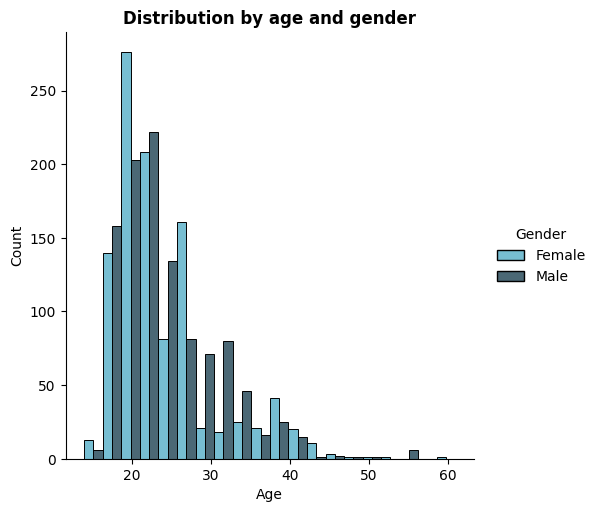

In [73]:
warnings.filterwarnings("ignore")
colors = ["#49A8C4", "#0E3547"]

sns.displot(x = df["Age"], hue = df["Gender"], bins=20, stat="count", multiple="dodge", palette = colors)
plt.title("Distribution by age and gender", fontweight="bold")
plt.show()


___
## Measures of dispersion

### Standard deviation:
Evaluate formulas manually and with pandas

  $sigma = \sqrt{\frac{\sum_{i=1}^{N}(x_i - \bar{x})^2}{N}}$




In [10]:
math.sqrt(((df["Age"]- df["Age"].mean())**2).sum()/total_registers)

6.344465024090456

* Change the precision in the result by applying the pandas "std()" method and performing the formula sequentially

In [11]:
df["Age"].std()

6.345968273732234

### Range and quartiles

In [12]:
rango = df["Age"].max() - df["Age"].min()
print("The age range is: {} ages".format(int(rango)))

The age range is: 47 ages


In [13]:
val_min = df["Age"].quantile(0)
val_max = df["Age"].quantile(1)
q1 = round(df["Age"].quantile(q = 0.25),2)
q2 = round(df["Age"].mean(), 2)
q3 = round(df["Age"].quantile(q = 0.75), 2)
print(" Minimun value: {}".format(val_min),"\n",
      "Interquartile range 1: {}".format(q1),"\n",
      "Mean: {}".format(q2),"\n",
      "Interquartile range 3: {}".format(q3),"\n",
      "Maximum value: {}".format(val_max),"\n",
)

 Minimun value: 14.0 
 Interquartile range 1: 19.95 
 Mean: 24.31 
 Interquartile range 3: 26.0 
 Maximum value: 61.0 



#### Box plot
* In the box plot we observe a greater amount of outlier data in the female gender.

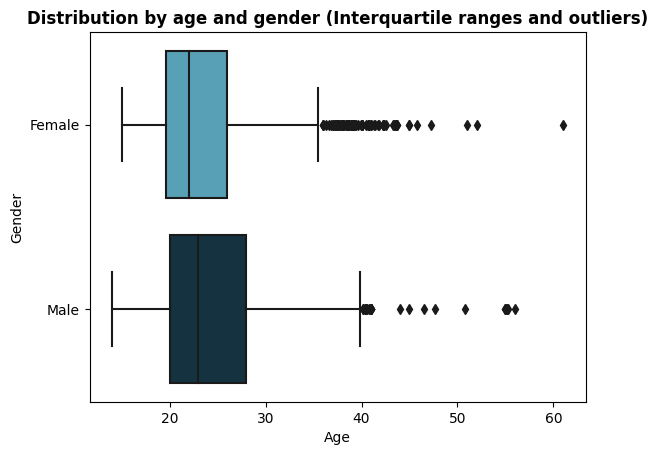

In [14]:
sns.boxplot(y = df["Gender"], x= df["Age"], palette = colors)
plt.title("Distribution by age and gender (Interquartile ranges and outliers)", fontweight="bold")
plt.show()

___
## Outlier detection
The interquartile range is used to determine the outlier data and the limits are defined by:
* *Upper bound: q3 + 1.5 * IQR*
* *Lower limit: q1 - 1.5 * IQR*

Based on the limits found, we can analyze the data set, as long as we do not need to analyze data with ages above or below.
As a result of eliminating the outliers from the data set, we obtain a more or less symmetrical graph.
* Define the interquartile range (IQR)

In [15]:
IQR = q3 - q1
IQR

6.050000000000001

In [16]:
upper_limit = round(q3 + 1.5 * IQR , 2)
lower_limit = round(q1 - 1.5 * IQR, 2)
print("Lower limit: {} ages".format(lower_limit), "\n"
      "Upper limit: {} ages" .format(upper_limit))

Lower limit: 10.87 ages 
Upper limit: 35.08 ages


#### A new data set with the outlier records removed

In [74]:
df_without_outliers = df[(df["Age"] < upper_limit) & (df["Age"] > lower_limit)]

count_df_base = df["Age"].count()
count_df_new = df_without_outliers["Age"].count()
deleted_records = count_df_base - count_df_new

print("Base data frame: {}".format(count_df_base))
print("New data frame: {}".format(count_df_new))
print("Deleted records: {}".format(deleted_records))

Base data frame: 2111
New data frame: 1943
Deleted records: 168


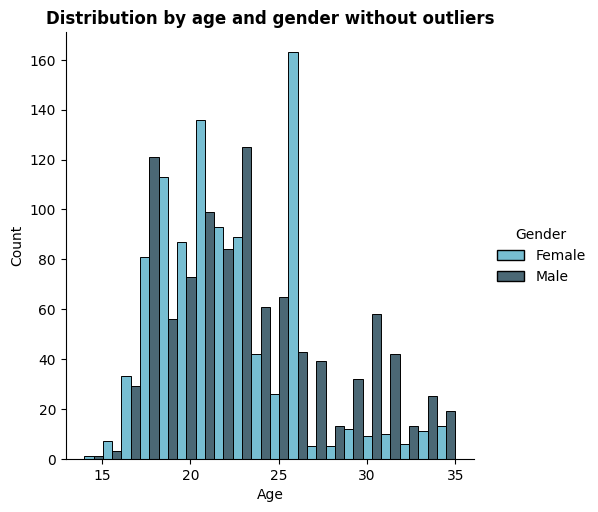

In [75]:
sns.displot(x = df_without_outliers["Age"], hue= df_without_outliers["Gender"], bins=20, stat="count", multiple="dodge", palette = colors)
plt.title("Distribution by age and gender without outliers" ,fontweight="bold")
plt.show()

___
## Linear scaling of numerical variables
### Linear scaling min-max
$ X_{\text{escalado}} = 2x - min - max /  max - min $

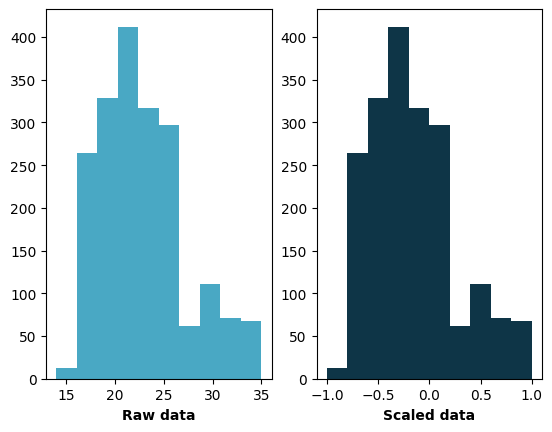

In [33]:
min_val_scl = df_without_outliers["Age"].min()
max_val_scl = df_without_outliers["Age"].max()
scaled_min_max_age = ((2*df_without_outliers["Age"] - min_val_scl - max_val_scl) / (max_val_scl - min_val_scl))

fig, axs = plt.subplots(nrows = 1, ncols = 2)
axs[0].hist(df_without_outliers["Age"], color = colors[0])
axs[0].set_xlabel("Raw data", fontweight="bold")
axs[1].hist(scaled_min_max_age, color = colors[1])
axs[1].set_xlabel("Scaled data", fontweight="bold")
plt.show()

### Z-score scaling
$ X_{\text{escalado}} = \frac{{X - \mu}}{{\sigma}}$

Also known as standardization, it is a technique used in statistics to transform a variable so that it has a mean (average) of zero and a standard deviation of one. This helps to compare and analyze variables that may have different scales and distributions.

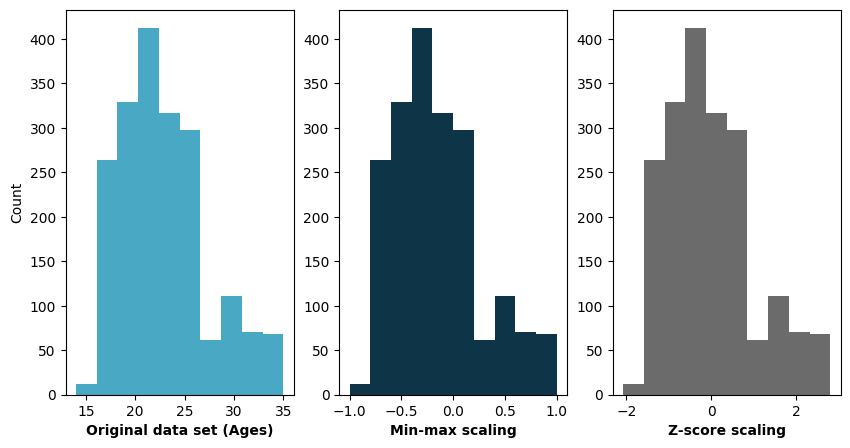

In [42]:
import numpy as np
std_df = np.std(df_without_outliers["Age"])
mean_df = np.mean(df_without_outliers["Age"])
scaled_z_score = (df_without_outliers["Age"] - mean_df)/ std_df

fig, axs = plt.subplots( nrows = 1, ncols = 3, figsize=(10,5))
axs[0].hist(df_without_outliers["Age"], color = colors[0])
axs[0].set_xlabel("Original data set (Ages)", fontweight="bold")
axs[0].set_ylabel("Count")

axs[1].hist(scaled_min_max_age, color = colors[1])
axs[1].set_xlabel("Min-max scaling", fontweight="bold")

axs[2].hist(scaled_z_score, color= "#6B6B6B")
axs[2].set_xlabel("Z-score scaling", fontweight="bold")
plt.show()


___
## Nonlinear scaling of numerical variables

It is used for highly skewed distributions, for our example we use the variable "Weight"

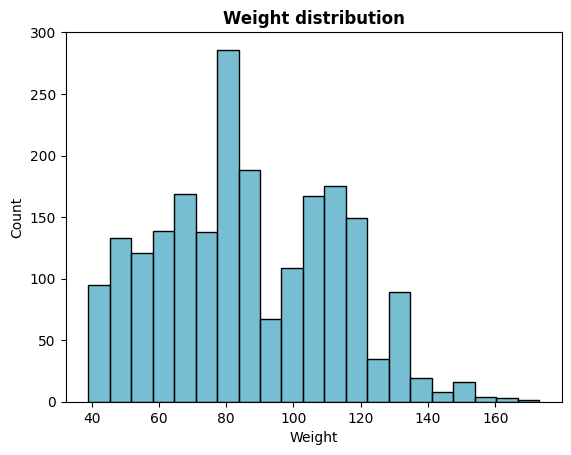

In [76]:
sns.histplot(df['Weight'], color = colors[0])
plt.title("Weight distribution" ,fontweight="bold")
plt.show()

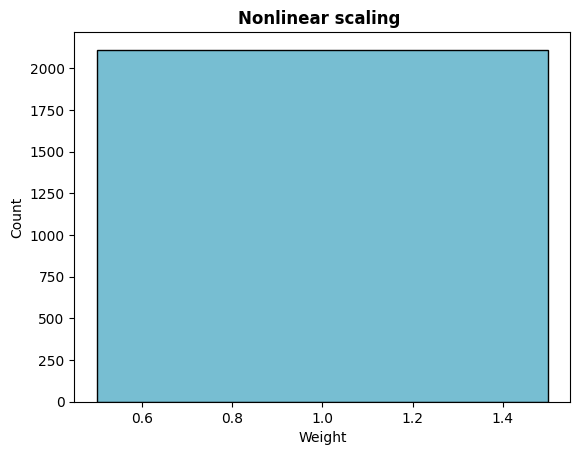

In [77]:
scaled_no_lineal_weigth = df["Weight"].apply(lambda x: np.tanh(x))

sns.histplot(scaled_no_lineal_weigth, color = colors[0])
plt.title("Nonlinear scaling " ,fontweight="bold")
plt.show()


* It is possible to calibrate the function by dividing the variable by a constant

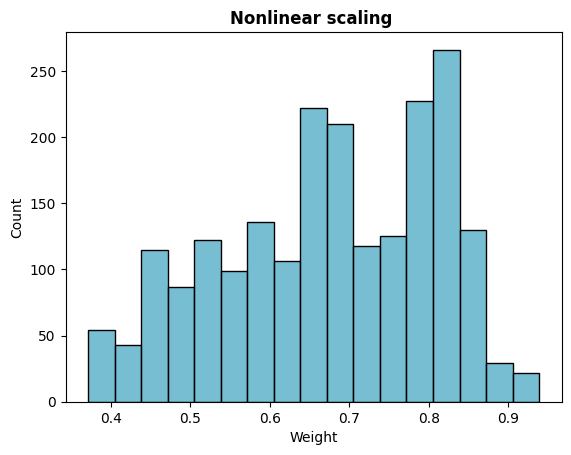

In [78]:
scaled_no_lineal_weigth = df["Weight"].apply(lambda x: np.tanh(x/100))

sns.histplot(scaled_no_lineal_weigth, color= colors[0])
plt.title("Nonlinear scaling " ,fontweight="bold")
plt.show()

___
## Scaling of categorical variables
### One-hot scaling
We perform the scaling on the "NObeyesdad" variable that indicates the level of overweight

In [51]:
df_without_outliers['NObeyesdad'].unique()

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

In [52]:
df_without_outliers.groupby("NObeyesdad").count()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
NObeyesdad,,,,,,,,,,,,,,,,
Insufficient_Weight,271,271,271,271,271,271,271,271,271,271,271,271,271,271,271,271
Normal_Weight,280,280,280,280,280,280,280,280,280,280,280,280,280,280,280,280
Obesity_Type_I,281,281,281,281,281,281,281,281,281,281,281,281,281,281,281,281
Obesity_Type_II,268,268,268,268,268,268,268,268,268,268,268,268,268,268,268,268
Obesity_Type_III,324,324,324,324,324,324,324,324,324,324,324,324,324,324,324,324
Overweight_Level_I,268,268,268,268,268,268,268,268,268,268,268,268,268,268,268,268
Overweight_Level_II,251,251,251,251,251,251,251,251,251,251,251,251,251,251,251,251


### One-hot with Scikit learn
* Create an encoder object. The handle_unknown="ignore" option indicates that the encoder should handle unknown values (not seen during tuning) without generating errors

In [59]:
encoder = preprocessing.OneHotEncoder(handle_unknown="ignore")

* The fit method learns the unique values present in the column and prepares the encoder to perform encoding.

In [60]:
encoder.fit(df_without_outliers[["NObeyesdad"]])

OneHotEncoder(handle_unknown='ignore')

* Adjust categorical data

In [ ]:
encoder.fit_transform([["Obesity_Type_I"],["Obesity_Type_II"],["Obesity_Type_III"]]).toarray()

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

### One-hot with pandas "dummies" method

In [67]:
df_NObeyesdad_one_hot = pd.get_dummies(df_without_outliers["NObeyesdad"], drop_first=True) * 1
df_NObeyesdad_one_hot

,Normal_Weight,Obesity_Type_I,Obesity_Type_II,Obesity_Type_III,Overweight_Level_I,Overweight_Level_II
0,1,0,0,0,0,0
1,1,0,0,0,0,0
2,1,0,0,0,0,0
3,0,0,0,0,1,0
4,0,0,0,0,0,1
...,...,...,...,...,...,...
2106,0,0,0,1,0,0
2107,0,0,0,1,0,0
2108,0,0,0,1,0,0
2109,0,0,0,1,0,0


#### Add the resulting columns to the data frame:

In [68]:
df_without_outliers = df_without_outliers.join(df_NObeyesdad_one_hot)

In [71]:
df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [69]:
df_without_outliers.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad', 'Normal_Weight', 'Obesity_Type_I',
       'Obesity_Type_II', 'Obesity_Type_III', 'Overweight_Level_I',
       'Overweight_Level_II'],
      dtype='object')